# **Lab2.2 : Image Enhancement with Statistical Operation** 

In this lab, you will execute two techniques: Image Histogram Equalization and Histogram Matching. Additionally, you will explore the pixel values of the image through a histogram.

In [200]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import ImageGrid

## **Histogram Equalization**
Read an image using OpenCV (Use your own image).

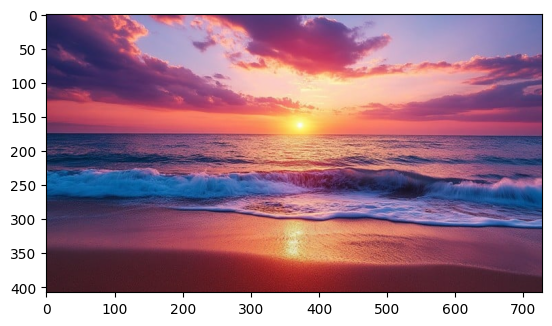

In [201]:
### START CODE HERE ###
img = cv2.imread('./img/image4.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert B

plt.imshow(img)
### END CODE HERE ###

Complete the `plot_histogram()` function below. This function returns the histogram of an image's pixel values, using `cv2.calcHist()`.

In [202]:
### START CODE HERE ###
def plot_histogram(image):
    
    hists = []
    
    for i in range(3):  # Loop through each channel (R, G, B)
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        hists.append(hist)
    
    return hists
### END CODE HERE ###

Display the output like the reference image below using subplot, where the first plot is the image and the second plot is the histogram of each channel.

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image-2.png](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/Image-Processing-Course-2025/main/Lab2_Image-Enhancement/assets/2-1.png?raw=true)
</details>

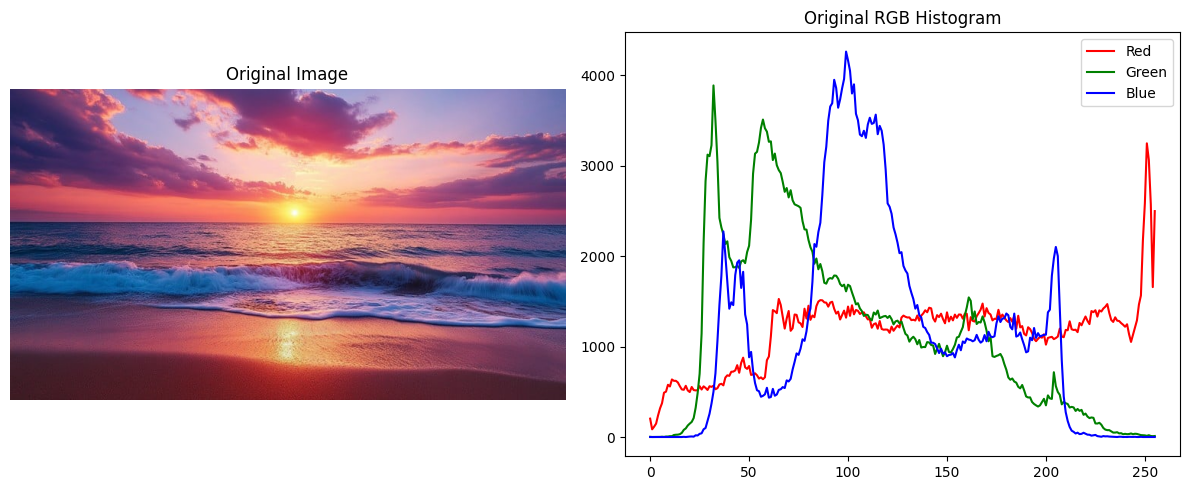

In [203]:
### START CODE HERE ###

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
hists = plot_histogram(img)

ax[0].imshow(img)
ax[0].axis('off')
ax[0].set_title('Original Image')

colors = ['r', 'g', 'b']
labels = ['Red', 'Green', 'Blue']
for hist, color, label in zip(hists, colors, labels):
    ax[1].plot(hist, color=color, label=label)

# ax[1].set_xlim([0, 256])
ax[1].set_title('Original RGB Histogram')
ax[1].legend()

plt.tight_layout()
plt.show()

### END CODE HERE ###

Now let's equalize the histogram of all channel using `cv2.equalizeHistogram()`<br/>
Display the output like the reference image below using subplot, where the first plot is the image and the second plot is the histogram of each channel that that has been equalized.

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image.png](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/Image-Processing-Course-2025/main/Lab2_Image-Enhancement/assets/2-2.png?raw=true)
</details>

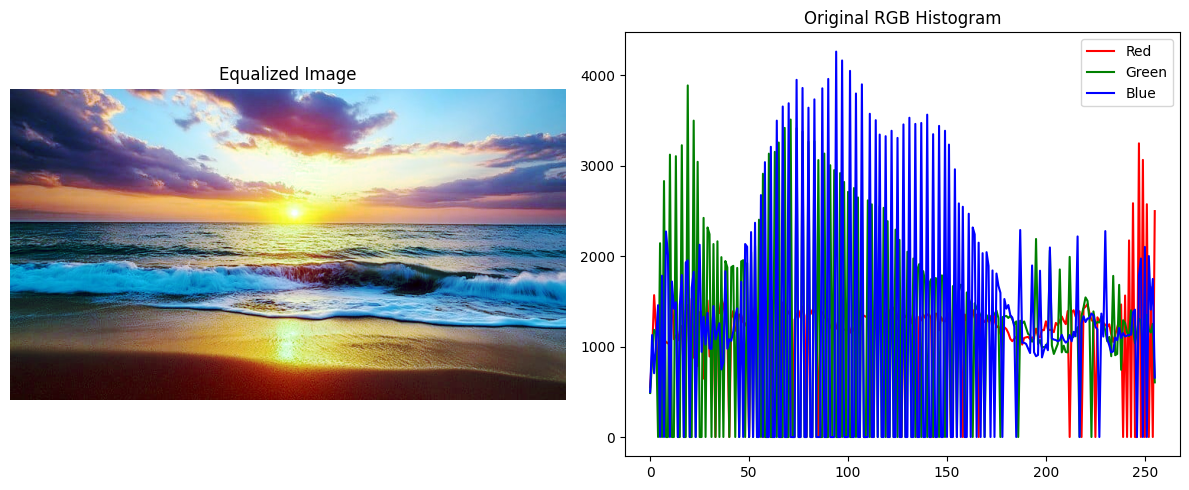

In [204]:
### START CODE HERE ###

r, g, b = cv2.split(img)

r_eq = cv2.equalizeHist(r)
g_eq = cv2.equalizeHist(g)
b_eq = cv2.equalizeHist(b)
img_eq = cv2.merge((r_eq, g_eq, b_eq))

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].imshow(img_eq)
ax[0].axis('off')
ax[0].set_title('Equalized Image')

hists_eq = plot_histogram(img_eq)
# colors = ['r', 'g', 'b']
# labels = ['Red', 'Green', 'Blue']
for hist, color, label in zip(hists_eq, colors, labels):
    ax[1].plot(hist, color=color, label=label)

# ax[1].set_xlim([0, 256])
ax[1].set_title('Original RGB Histogram')
ax[1].legend()

plt.tight_layout()
plt.show()


### END CODE HERE ###

## **Image Histogram Matching**
Read 2 images using OpenCV. Use your own images. One image will be the input image and the other will be the template image.

In [205]:
### START CODE HERE ###


img1 = cv2.imread('./img/image3.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

img2 = cv2.imread('./img/image4.jpg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)


### END CODE HERE ###

Let's explore 2 images. Use suplot to plot :
- An image
- PDF(Probability Density Function) of each channel
- CDF(Cumulative Distribution Function) of each channel 

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image.png](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/Image-Processing-Course-2025/main/Lab2_Image-Enhancement/assets/2-3.png?raw=true)
</details>

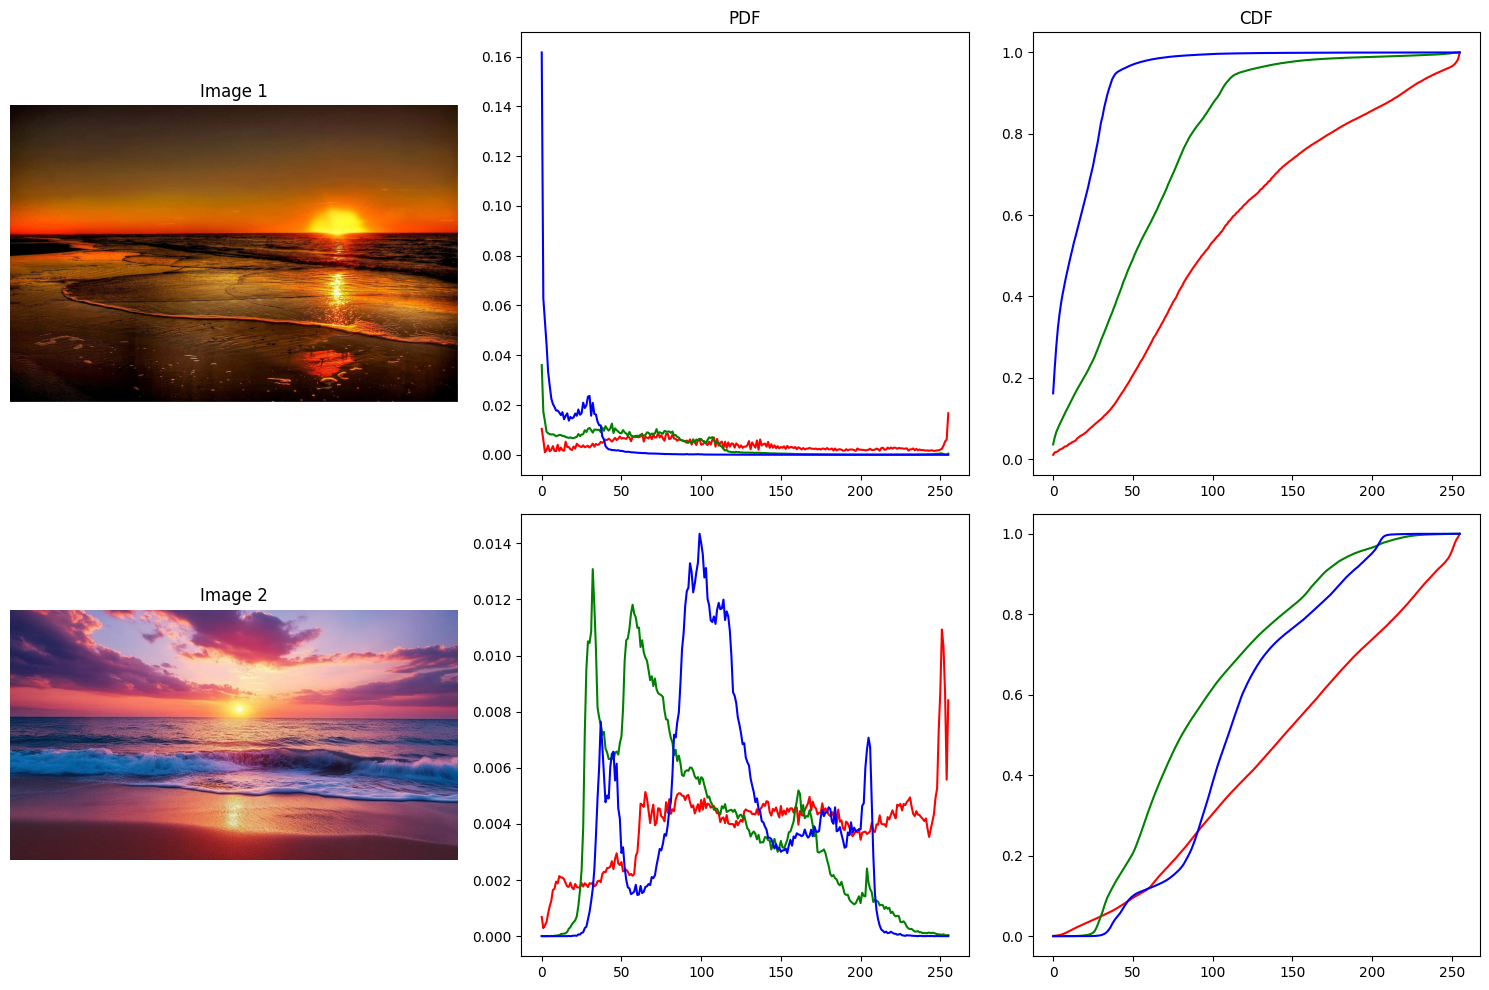

In [206]:
### START CODE HERE ###

images = [img1, img2]
fig, ax = plt.subplots(2, 3, figsize=(15, 10))

for i, img in enumerate(images): 
    ax[i, 0].imshow(img)
    ax[i, 0].axis('off')
    ax[i, 0].set_title(f'Image {i + 1}')

def plot_pdf_cdf(image, pdf_ax, cdf_ax):

    for i, color in enumerate(colors):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        pdf = hist.flatten() / hist.sum() # Normalize to get PDF (hist / total pixels)
        cdf = np.cumsum(pdf) # CDF is the cumulative sum of PDF

        pdf_ax.plot(pdf, color=color)
        cdf_ax.plot(cdf, color=color)

# Plot PDF and CDF for both images
ax[0, 1].set_title('PDF')
ax[0, 2].set_title('CDF')
plot_pdf_cdf(img1, ax[0, 1], ax[0, 2])
plot_pdf_cdf(img2, ax[1, 1], ax[1, 2])

# hists1 = plot_histogram(img1)
# for hist, color in zip(hists1, colors):
#     pdf = hist.flatten() / hist.sum()
#     cdf = np.cumsum(pdf)
#     ax[0, 1].plot(pdf, color=color)
#     ax[0, 2].plot(cdf, color=color)

# hists2 = plot_histogram(img2)   
# for hist, color in zip(hists2, colors):
#     pdf = hist.flatten() / hist.sum()
#     cdf = np.cumsum(pdf)
#     ax[1, 1].plot(pdf, color=color)
#     ax[1, 2].plot(cdf, color=color)

plt.tight_layout()
plt.show()


### END CODE HERE ###

Perform Histogram matching in the cell below.
Show the result like the reference image below.

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image.png](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/Image-Processing-Course-2025/main/Lab2_Image-Enhancement/assets/2-4.png?raw=true)
</details>

In [207]:
def match_histograms_manual(src, ref):
    
    matched = np.zeros_like(src)
    
    for ch in range(3):  # R, G, B

        # 1. Create histogram & CDF
        src_hist, _ = np.histogram(src[:, :, ch].flatten(), 256, [0,256])
        ref_hist, _ = np.histogram(ref[:, :, ch].flatten(), 256, [0,256])

        src_cdf = np.cumsum(src_hist).astype(np.float32)
        ref_cdf = np.cumsum(ref_hist).astype(np.float32)

        src_cdf /= src_cdf[-1]
        ref_cdf /= ref_cdf[-1]

        # 2. Use np.searchsorted for map pixel
        mapping = np.searchsorted(ref_cdf, src_cdf)

        # 3. Apply mapping
        matched[:, :, ch] = mapping[src[:, :, ch]]

    return matched


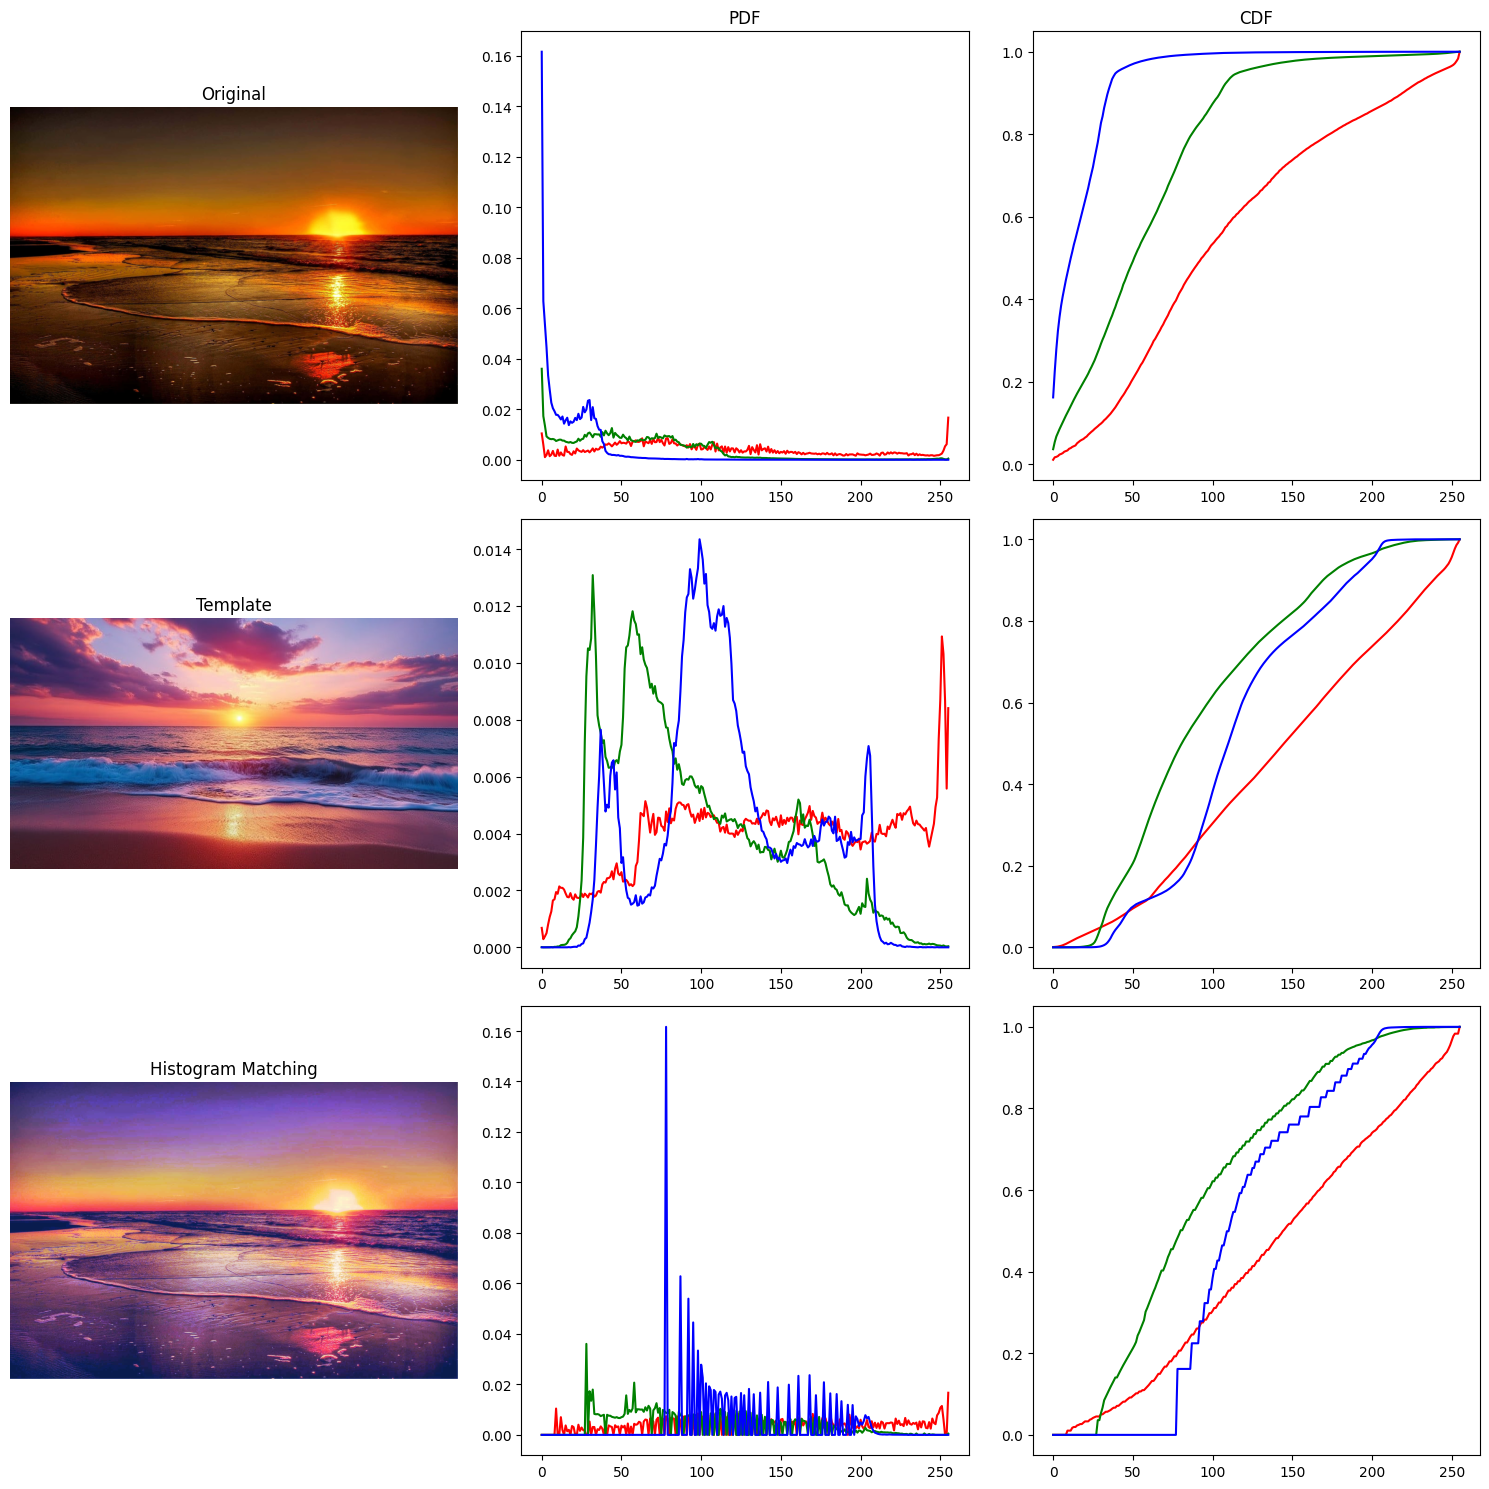

In [211]:
### START CODE HERE ###
from skimage.exposure import match_histograms

img3 = match_histograms(img1, img2, channel_axis=-1)
images = [img1, img2, img3]
titles = ['Original', 'Template', 'Histogram Matching']
fig, ax = plt.subplots(3, 3, figsize=(15, 15))

for i, (img, title) in enumerate(zip(images, titles)): 
    ax[i, 0].imshow(img)
    ax[i, 0].axis('off')
    ax[i, 0].set_title(title)
    plot_pdf_cdf(img, ax[i, 1], ax[i, 2])

# Plot PDF and CDF for both images
ax[0, 1].set_title('PDF')
ax[0, 2].set_title('CDF')


plt.tight_layout()
plt.show()

### END CODE HERE ###

---

## **Questions**
1. If an image having a dense histogram concentrated at high intensity, how would an image appear when you display on a device.
2. If we want to enhance the image explained in question 1 using histogram matching, how would the histogram of the template image should be?
3. How would we enhance an image having too bright in some area and too dark in another area?

## **Answers**
1. จะทำให้ภาพนั้นดูสว่างมากเกือบทั้งภาพ เพราะค่าของ pixel ส่วนใหญ่รวมตัวกันอยู่ตรงช่วงสว่าง
2. histogram ของ template ควรมี ค่าความเข้ม (intensity) มีทั้งมืด กลาง และสว่างอย่างพอดี เพื่อให้หลังจากทำ matching แล้วภาพที่สว่างเกินไปจะถูกดึงให้เห็นรายละเอียดที่มืดได้ชัดขึ้น
3. ทำ histogram equalization แบบเฉพาะพื้นที่ (Local)

In [ ]:
# Histogram Equalization (Local)